In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import seaborn as sns

In [2]:
#Given local path, find full path
def PathFinder(path):
    #python 2
    #script_dir = os.path.dirname('__file__')
    #fullpath = os.path.join(script_dir,path)
    #python 3
    fullpath=os.path.abspath(path)
    print(fullpath)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return pd.read_csv(fullpath, sep=',', header=0,index_col=False)

In [3]:
data_final_df=ReadData('../DATA/VIZ/RES_compare.txt')

/home/wuga/Documents/Notebook/VAE-PLANNING/DATA/VIZ/RES_compare.txt


In [4]:
data_final_df

,Domain_Type,Horizon,TF,MILP,FMC,Heuristic
0,Linear,30,-1777.4105,-1777.41,0.0,-1863.2897
1,Linear,60,-2254.9523,-2254.96,0.0,-2373.5592
2,Linear,120,-3097.4951,-3097.50,0.0,-3281.5565
3,Nonlinear,30,-1056.6219,0.00,-1039.3,-1610.4642
4,Nonlinear,60,-1490.1115,0.00,-2479.4,-2589.7871
5,Nonlinear,120,-2353.7919,0.00,-124520.0,-4548.4012


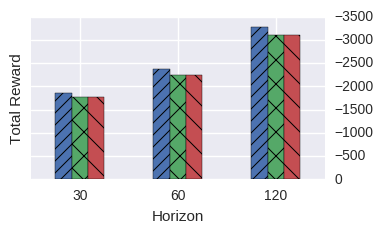

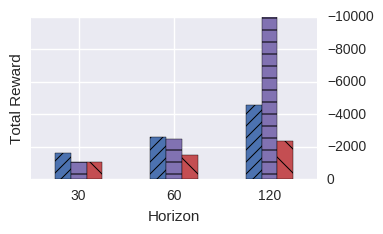

In [7]:
dfs = data_final_df.groupby(['Domain_Type'])
current_palette = sns.color_palette()
counter=0
leg=list(range(3))
for name,group in dfs:
    if name == 'Linear' or name =='Bilinear':
        plot = group[['Domain_Type','Horizon','Heuristic','MILP','TF']].plot(kind='bar', color=current_palette,x=['Horizon'], legend=False)
    else:
        current_palette[1]=current_palette[3]
        plot = group[['Domain_Type','Horizon','Heuristic','FMC','TF']].plot(kind='bar', color=current_palette,x=['Horizon'], legend=False)
    fig = plot.get_figure()
    ax = fig.add_subplot(111)
    ax.yaxis.tick_right()
    if name == 'Nonlinear':
        ax.set_ylim([-10000,0])
    fig.set_size_inches(4, 2.5)
    if name == 'Linear' or name =='Bilinear':
        hatches = ['//', 'x','\\']
    else:
        hatches = ['//','-','\\']
    for i,thisbar in enumerate(plot.patches):
        if(i<3):
            thisbar.set_hatch(hatches[0])
        elif(i<6):
            thisbar.set_hatch(hatches[1])
        else:
            thisbar.set_hatch(hatches[2])
    plt.xticks(rotation=0)
    #plt.yticks(rotation=15)
    plt.ylabel('Total Reward')
    #plt.xlabel('Domain,Size,Horizon')
    plt.gca().invert_yaxis()
    plt.xlabel('Horizon')
    plt.tight_layout()
    #if counter ==1:
    #    plt.legend(fancybox=True,loc='upper left', prop={'size':7})
    #leg[counter].get_frame().set_alpha(0.5)
    counter=counter+1
    plt.savefig('../PLOTS/RES_'+name+'_BAR.eps',format='eps')